In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings 
warnings.filterwarnings('ignore')

In [2]:
flight=pd.read_csv('Flight_Price.csv')

In [3]:
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
flight.shape

(10683, 11)

In [5]:
flight.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL ? GOI ? BOM ? COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [6]:
flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
flight=flight[~flight['Route'].isnull()]

In [8]:
flight=flight[~flight['Total_Stops'].isnull()]

In [9]:
flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
flight.to_csv('flight_upd.csv')

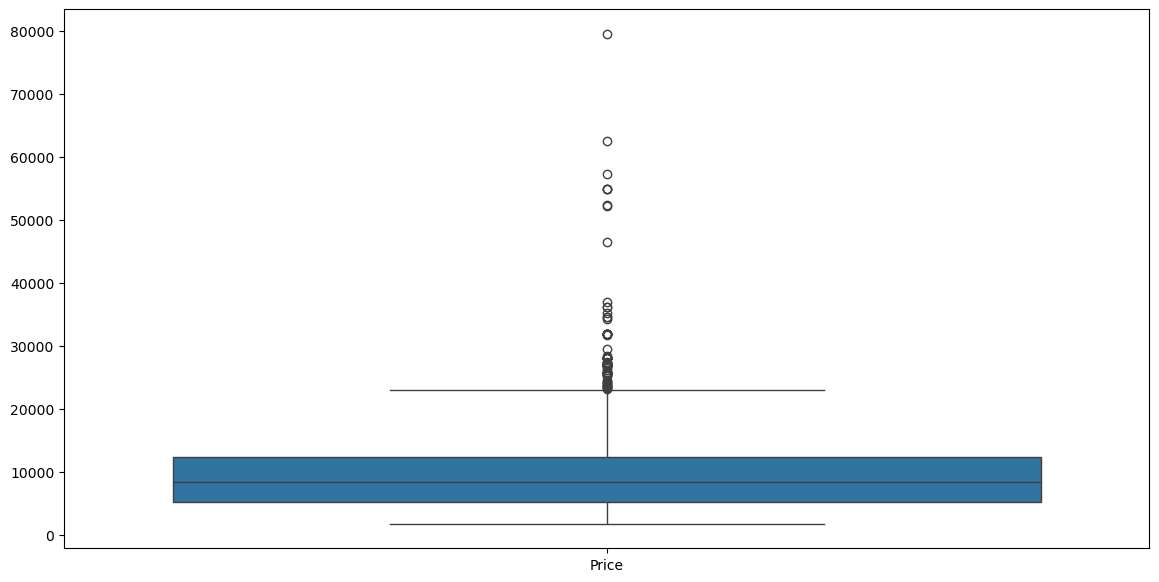

In [11]:
plt.figure(figsize=(14,7))
sns.boxplot(flight)
plt.show()

In [12]:
#EXTRACT HOUR AND MIN
def get_hour_min(Duration):
    hours,minutes=0,0
    
    if  'h' in Duration:
     hours = int(Duration.split('h')[0].strip())

    if  'm' in Duration:
     minutes=int(Duration.split('m')[0].strip()[-1].strip())

    return hours,minutes

In [13]:
flight[['Duration_IN_Hours','Duration_IN_Min']]=flight['Duration'].apply(lambda x: pd.Series(get_hour_min(x)))

In [14]:
flight=flight.drop('Duration',axis=1)

In [15]:
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Duration_IN_Hours,Duration_IN_Min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,non-stop,No info,3897,2,0
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,2 stops,No info,7662,7,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,2 stops,No info,13882,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,1 stop,No info,6218,5,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,1 stop,No info,13302,4,5


In [16]:
duration=flight['Duration_IN_Hours']*60 + flight['Duration_IN_Min']

In [17]:
flight['price_per_min']=duration*60/flight['Price']

In [18]:
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Duration_IN_Hours,Duration_IN_Min,price_per_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,non-stop,No info,3897,2,0,1.847575
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,2 stops,No info,7662,7,5,3.328113
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,2 stops,No info,13882,19,0,4.927244
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,1 stop,No info,6218,5,5,2.943069
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,1 stop,No info,13302,4,5,1.105097


In [19]:
flight.isnull().sum()

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Total_Stops          0
Additional_Info      0
Price                0
Duration_IN_Hours    0
Duration_IN_Min      0
price_per_min        0
dtype: int64

In [20]:
flight.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Total_Stops', 'Additional_Info', 'Price',
       'Duration_IN_Hours', 'Duration_IN_Min', 'price_per_min'],
      dtype='object')

### EDA

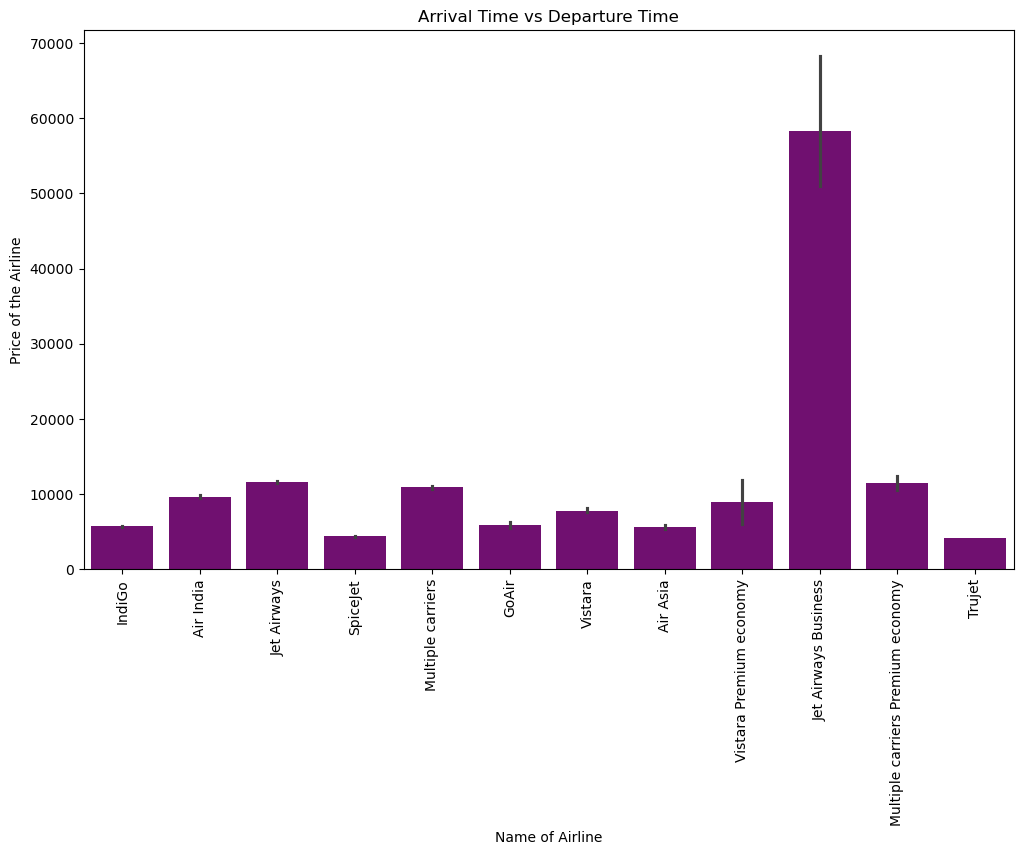

In [22]:
plt.figure(figsize=(12,7))
sns.barplot(x='Airline',y='Price',data=flight,color='purple')
plt.xlabel("Name of Airline")
plt.ylabel("Price of the Airline")
plt.title("Arrival Time vs Departure Time")
plt.xticks(rotation=90)
plt.show()

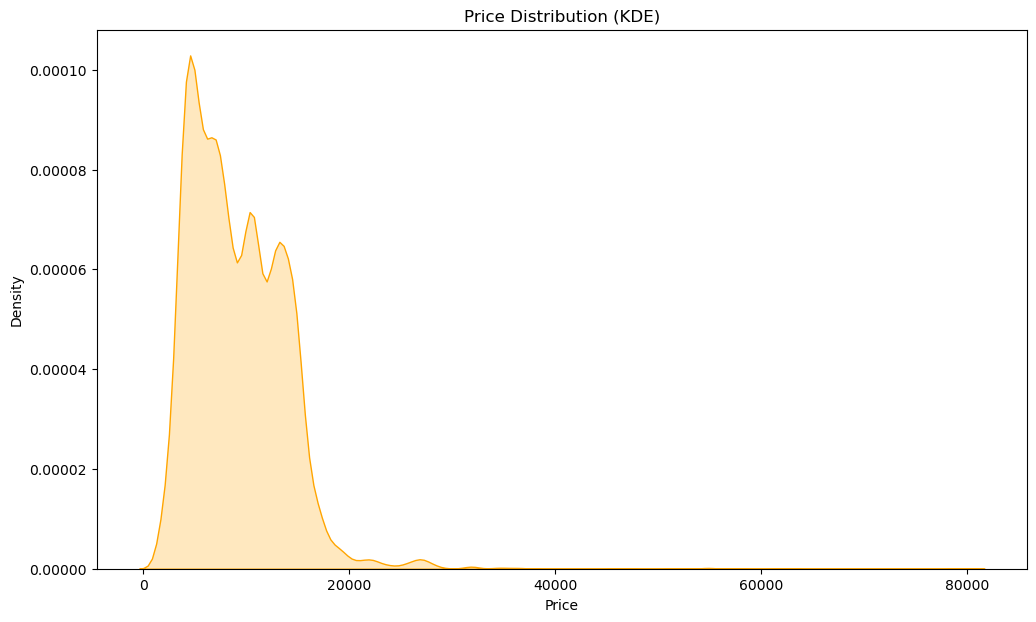

In [23]:
plt.figure(figsize=(12, 7))
sns.kdeplot(flight['Price'], shade=True,color="Orange")
plt.xlabel("Price")
plt.ylabel("Density")
plt.title("Price Distribution (KDE)")
plt.show()

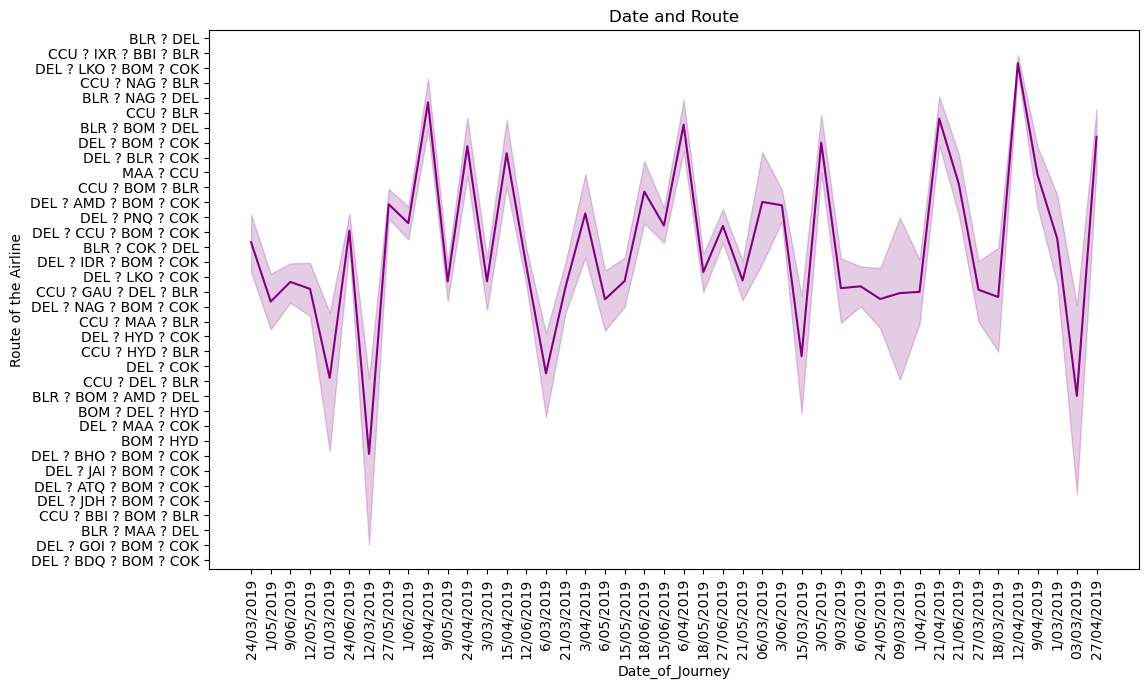

In [24]:
plt.figure(figsize=(12,7))
sns.lineplot(x='Date_of_Journey',y='Route',data=flight,color='purple')
plt.xlabel("Date_of_Journey")
plt.ylabel("Route of the Airline")
plt.title("Date and Route")
plt.xticks(rotation=90)
plt.show()

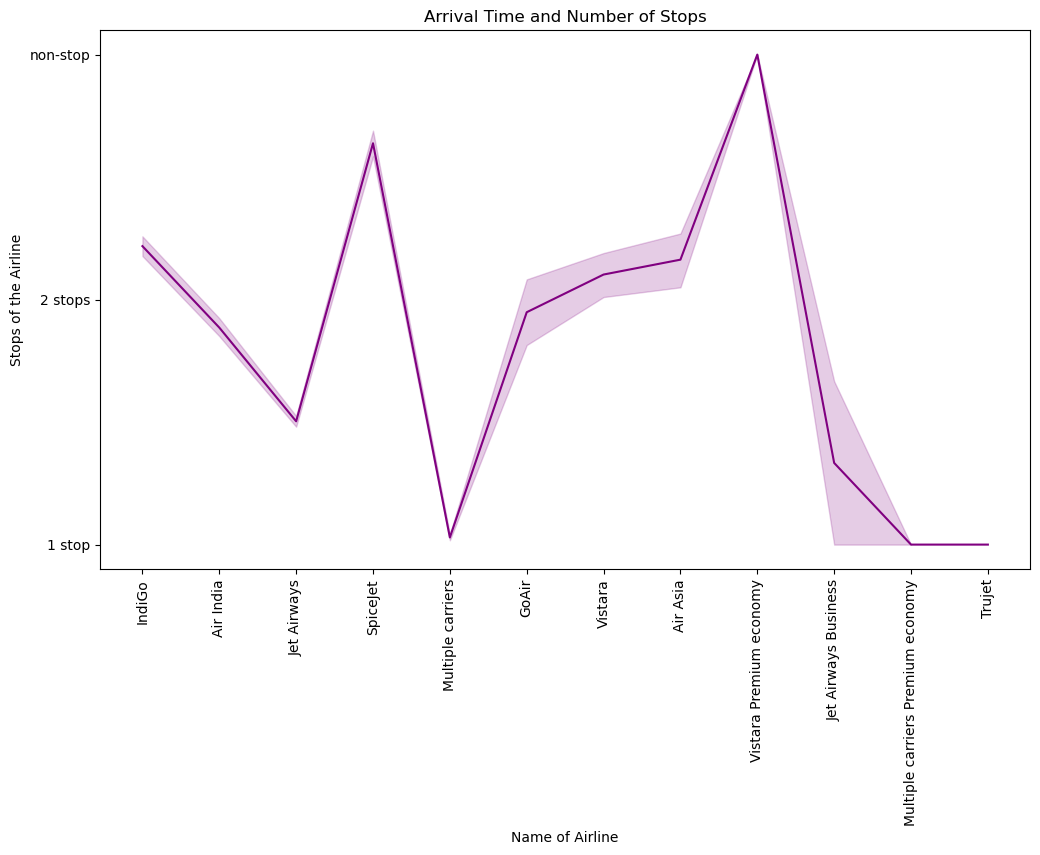

In [25]:
plt.figure(figsize=(12,7))
sns.lineplot(x='Airline',y='Total_Stops',data=flight,color='purple')
plt.xlabel("Name of Airline")
plt.ylabel("Stops of the Airline")
plt.title("Arrival Time and Number of Stops")
plt.xticks(rotation=90)
plt.show()

In [26]:
flight_num=flight.select_dtypes(include=np.number)

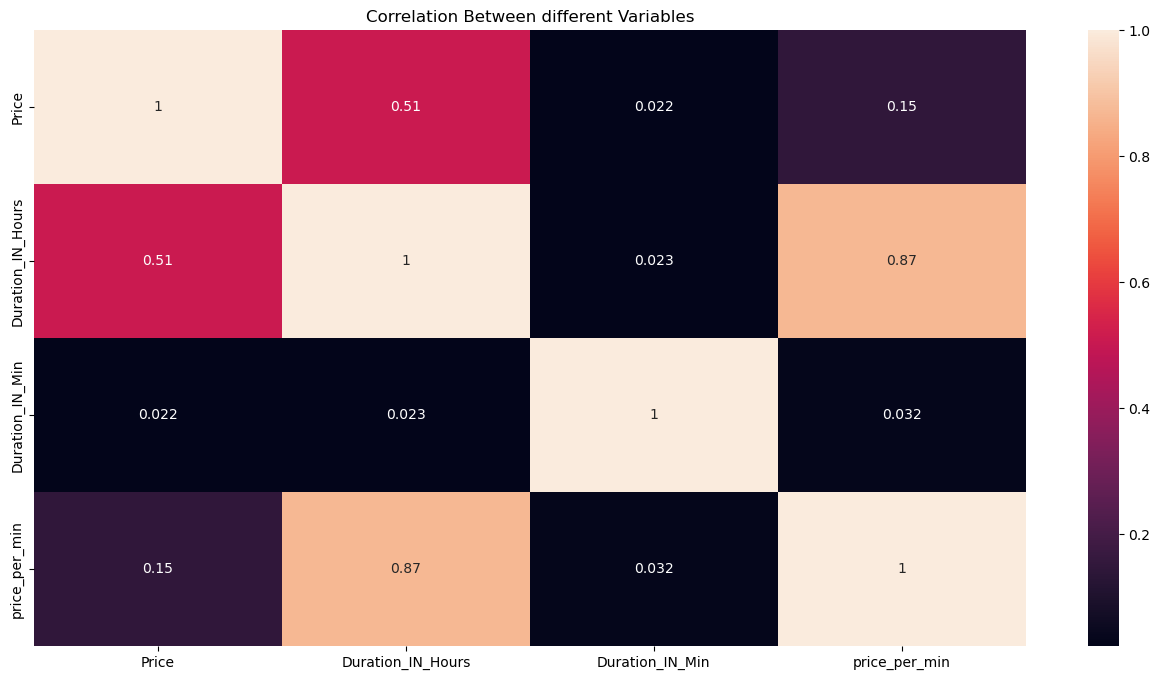

In [27]:
plt.figure(figsize=(16,8))
sns.heatmap(flight_num.corr(),annot=True)
plt.title("Correlation Between different Variables")
plt.show()

### Model building and testing

In [29]:
flight_num.head()

,Price,Duration_IN_Hours,Duration_IN_Min,price_per_min
0,3897,2,0,1.847575
1,7662,7,5,3.328113
2,13882,19,0,4.927244
3,6218,5,5,2.943069
4,13302,4,5,1.105097


# LinearRegression

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 

In [32]:
X=flight_num.drop(columns=["Price"])
y=flight['Price']

In [33]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

# RandomForestRegressor

In [36]:
from sklearn.ensemble import RandomForestRegressor 

# XGBoost

In [38]:
 !pip install xgboost


In [39]:
from xgboost import XGBRegressor

In [40]:
import mlflow
from mlflow.models import infer_signature

In [41]:
models= {
    "LinearRegression": {
         "model": LinearRegression(),
         "params":{
             "fit_intercept":True,
         }
    },
    "RandomForest":{
        "model":RandomForestRegressor(),
        "params":{
            "n_estimators":100,
            "max_depth":None,
            "min_samples_split":2,
            "min_samples_leaf":1,
         }
    },
    "xgboost":{
        "model": XGBRegressor(),
        "params":{
            "n_estimators":100,
            "learning_rate":0.1,
            "max_depth":3,
            "subsample":0.8,
            "colsample_bytree":0.8
        }
    }
}
                
        
    
    

In [42]:
print(models['RandomForest']['params'])

{'n_estimators': 100, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}


In [43]:
reports=[]

for model_name, model_data in models.items():
    model = model_data["model"]
    params = model_data["params"]

    model.set_params(**params)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    mae=mean_absolute_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)

    reports.append((model_name,model, rmse, mae, r2))

 

In [44]:
reports

[('LinearRegression',
  LinearRegression(),
  2924.9685488054865,
  1869.274962230965,
  0.6040935815726166),
 ('RandomForest',
  RandomForestRegressor(),
  311.88848848080517,
  54.580837622835745,
  0.9954985872924712),
 ('xgboost',
  XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.8, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=3, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 

In [45]:
mlflow.set_experiment("EXPERIMENTS FOR FLIGHT DATA--")
mlflow.set_tracking_uri('http://127.0.0.1:5000/')

for report in reports:
        model_name,trained_model,model_rmse, model_mae,model_r2=report

        with mlflow.start_run(run_name=model_name):
            mlflow.log_params(models[model_name]['params'])
            mlflow.log_metrics({'RMSE':model_rmse,
                            'MAE':model_mae,
                            'R2':model_r2})
            input_example =pd.DataFrame(X_train[:1],columns=X_train.columns)
            signature= infer_signature(X_train,model.predict(X_train))
            if 'xgboost' in model_name:
                mlflow.xgboost.log_model(model,'model',signature=signature,input_example=input_example)
    
            else:
                mlflow.sklearn.log_model(model,'model',signature=signature,input_example=input_example)
    
print("Mlflow logging Done")

2025/02/28 18:17:40 INFO mlflow.tracking.fluent: Experiment with name 'EXPERIMENTS FOR FLIGHT DATA--' does not exist. Creating a new experiment.


🏃 View run LinearRegression at: http://127.0.0.1:5000/#/experiments/522175235293403753/runs/b9908a399c9f4d11a2d099c1312744e4
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/522175235293403753


🏃 View run RandomForest at: http://127.0.0.1:5000/#/experiments/522175235293403753/runs/1548c1bc344246ef98856155f6c39aed
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/522175235293403753


🏃 View run xgboost at: http://127.0.0.1:5000/#/experiments/522175235293403753/runs/949ba63a78aa47da86ae4dbe532a07ae
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/522175235293403753
Mlflow logging Done


In [46]:
from mlflow.tracking import MlflowClient
from mlflow.exceptions import MlflowException

client = MlflowClient()

run_ids = {
    "LinearRegression": "b8c847e8feb34f10a652faeb27122a60",
    "RandomForest": "e0bf81bac3a74e2b9e24b169bf6900f7",
    "xgboost": "a3dabb351d114d639d35d8103859c957"
}

for model_name, run_id in run_ids.items():
    try:
        # First, check if the model is already registered. If not, register it.
        try:
            client.get_registered_model(model_name)
            print(f"Model {model_name} is already registered.")
        except MlflowException:
            # If the model is not registered, create it
            client.create_registered_model(model_name)
            print(f"Model {model_name} is now registered.")

        # Create a new model version from the run
        source = f"runs:/{run_id}/model"
        client.create_model_version(name=model_name, source=source, run_id=run_id)
        print(f"Model version for {model_name} registered successfully.")
    
    except MlflowException as e:
        print(f"Error registering model version for {model_name}: {e}")

print("\nAll models registered.")


2025/02/28 18:18:57 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: LinearRegression, version 1


Model LinearRegression is now registered.
Model version for LinearRegression registered successfully.
Model RandomForest is now registered.


2025/02/28 18:18:58 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: RandomForest, version 1
2025/02/28 18:18:58 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: xgboost, version 1


Model version for RandomForest registered successfully.
Model xgboost is now registered.
Model version for xgboost registered successfully.

All models registered.
